In [98]:
import tensorflow as tf


In [99]:
mnist=tf.keras.datasets.mnist

In [100]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [101]:
x_train.shape

(60000, 28, 28)

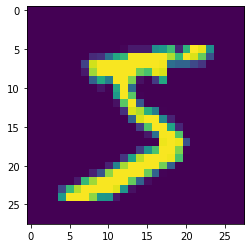

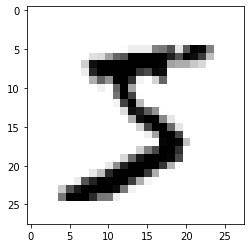

In [102]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[0])
plt.show()

plt.imshow(x_train[0], cmap = plt.cm.binary)


In [103]:
print(x_train[0]) 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

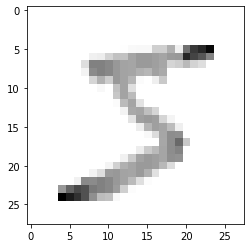

In [104]:
## it is an grey image and all the values varies from 0 to 255 
#to normalize it 

x_train = tf.keras.utils.normalize (x_train, axis=1)
x_test =  tf.keras.utils.normalize (x_test, axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [105]:
#after normalize

print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [106]:
print(y_train[0])

5


Resizing image to make it suitable for apply Convulation operation 

In [107]:
import numpy as np 
IMG_SIZE = 28 
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1 )
print ("Training Samples dimension", x_trainr.shape)
print ("Testing Samples dimesion", x_testr.shape)
       

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimesion (10000, 28, 28, 1)


Creating a Deep Neural Network

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [109]:
## Creating a neural network 

model = Sequential()

#First Convulation Layer

model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1: ]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


#second Convulation Layer 

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


#third Convulation Layer 

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


##Fully Connected layer #1

model.add (Flatten())
model.add (Dense(64))
model.add(Activation("relu"))


##Fully Connected Layer #2

model.add (Dense(32))
model.add(Activation("relu"))


## Last Fully Connected Layer 

model.add (Dense(10))
model.add(Activation("softmax"))

In [110]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 activation_21 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 activation_22 (Activation)  (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                 

In [111]:
print ("Total Training Sapmles = ", len(x_trainr))

Total Training Sapmles =  60000


In [112]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
model.fit(x_trainr , y_train, epochs= 5, validation_split= 0.3)

Epoch 1/5
1021/1313 [======================>.......] - ETA: 11s - loss: 0.0341 - accuracy: 0.9892

In [ ]:
test_loss, test_acc = model.evaluate (x_testr , y_test)
print ("test loss on 10,000 test samples " , test_loss )
print ("Validation Accuracy on 10,000 test samples ", test_acc )

313/313 [==============================] - 3s 10ms/step - loss: 2.3032 - accuracy: 0.1043
test loss on 10,000 test samples  2.3031578063964844
Validation Accuracy on 10,000 test samples  0.10429999977350235


In [ ]:
predictions = model.predict([x_testr])

In [ ]:
print (predictions)

[[0.09969037 0.10262099 0.09801741 ... 0.09996348 0.10580863 0.09753332]
 [0.09968587 0.10190651 0.09742208 ... 0.10071963 0.104026   0.0991008 ]
 [0.09924083 0.10282824 0.09821494 ... 0.10049621 0.10275456 0.09947308]
 ...
 [0.10009528 0.10259143 0.09766647 ... 0.10032818 0.10429335 0.09868184]
 [0.09896582 0.10214767 0.09781207 ... 0.10075088 0.10407223 0.09903868]
 [0.09940501 0.10178104 0.09828401 ... 0.0999511  0.1029316  0.09948852]]


In [ ]:
print (np.argmax(predictions[0]))

8


In [ ]:
x_test[0].shape

(28, 28)

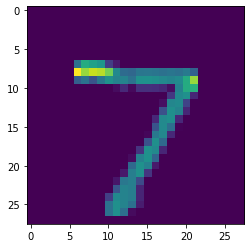

In [ ]:
plt.imshow(x_test[0])

In [ ]:
print (np.argmax (predictions[128]))

8


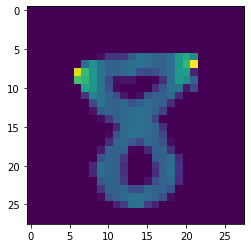

In [ ]:
plt.imshow(x_test[128])

In [92]:
 import cv2 

In [93]:
img = cv2.imread('eight.png')

TypeError: ignored

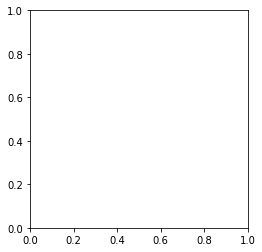

In [94]:
plt.imshow(img)

In [96]:
img.shape

AttributeError: ignored

In [95]:
gray = cv2.cvtcolor(img, cv2.COLOR_BGR2GRAY)

AttributeError: ignored

In [97]:
gray.shape

NameError: ignored

In [ ]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [ ]:
resized.shape

In [ ]:
newing = tf.keras.utils.normalize (resized, axis = 1)

In [ ]:
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [ ]:
newing.shape

In [ ]:
predictions = model.predict(newing)

In [ ]:
print (np.argmax(predictions))